## The analysis of Pig data analysis
- Analysis of Growth Performance in Swine based on Machine Learning
- Authors: Woongsup Lee, Younghwa Ham, and Tae-Won Ban

In [1]:
# import some essential libs
import tensorflow as tf
import os
import numpy as np
from sklearn import tree
import glob
from numpy import genfromtxt
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
from datetime import datetime
from pandas.tools.plotting import scatter_matrix
from sklearn import linear_model
from mpl_toolkits.mplot3d import Axes3D
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import math
from sklearn import svm
from IPython.display import Image 
import pydotplus
from sklearn import metrics
from IPython.display import Image
from sklearn.externals.six import StringIO
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from __future__ import print_function


%matplotlib inline

In [2]:
## Temporarily hold data
list_label = []
list_data = []


data_files = glob.glob('*.csv*')
for data_file in data_files:
    print(data_file)
    df = pd.read_csv(data_file)
    if data_file.split('.')[0] == 'label':
        df.PigroomIdentifyNo = df.PigroomIdentifyNo.astype('int64')
        list_label.append(df)
    else:
        ## Remove the fist calumn
        first_label = df.columns.values[0]
        df = df.drop([first_label], axis=1)
        list_data.append(df)

480171030180306.csv
480180312180727.csv
481171031180319.csv
481180326180812.csv
482171113180319.csv
482180319180820.csv
484171120180322.csv
484180409180914.csv
485171218180408.csv
485180408180919.csv
488171220180502.csv
490180410180823.csv
491180410180823.csv
492180410180823.csv
493180207180608.csv
494180116180608.csv
497171130180402.csv
497180426180822.csv
498180308180628.csv
499171228180502.csv
499180524180918.csv
500180308180628.csv
501180111180601.csv
502171215180416.csv
502180426180826.csv
504171221180426.csv
504180503180912.csv
506180111180508.csv
507180104180502.csv
507180524180912.csv
508180208180615.csv
509180226180629.csv
510180301180710.csv
511180309180723.csv
514180201180429.csv
514180521180828.csv
515180121180418.csv
515180514180815.csv
516180430180730.csv
517180406180816.csv
518180306180705.csv
519180417180906.csv
520180411180912.csv
521180202180607.csv
522180105180508.csv
522180515180917.csv
523180112180513.csv
524180119180513.csv
525180126180530.csv
546180424180815.csv


In [3]:
## concating the data
pd_data = pd.concat(list_data, ignore_index=True)
pd_label = pd.concat(list_label, ignore_index=True)

In [4]:
pd_data.head(5)

,PigroomIdentifyNo,Farm_no,PigroomNo,Date,Time,temp1,temp2,hum1,hum2,co2,effective,tempMax,tempMin
0,480171030180306,121,480,2018-02-09,13:57:00,22.7,22.6,66.7,62.8,2891,20.37,23.9,8.1
1,480171030180306,121,480,2018-02-09,13:58:00,22.6,22.6,66.7,62.6,2917,20.32,23.9,8.1
2,480171030180306,121,480,2018-02-09,13:59:00,22.6,22.5,66.7,62.0,2915,20.27,23.9,8.1
3,480171030180306,121,480,2018-02-09,14:01:00,22.6,22.5,66.4,62.2,2895,20.27,23.9,8.1
4,480171030180306,121,480,2018-02-09,14:06:00,22.6,22.5,67.2,60.8,2852,20.27,23.9,8.1


In [5]:
pd_label.head(5)

,PigroomIdentifyNo,Num_units,Age,Init_weight,ADG,Feed,Time_for_105,PG,FP_grade,Num_out,Density
0,517180406180816,301,70,29,0.717,3.15,176,71,73,214,120.4
1,522180105180508,300,74,32,0.800,2.86,164,91,119,272,100.0
2,522180515180917,298,67,28,0.719,2.82,174,85,91,252,99.3
3,523180112180513,300,75,33,0.754,3.09,170,86,109,258,100.0
4,524180119180513,300,74,32,0.791,2.93,166,88,95,264,100.0


## Normalize the data

In [6]:
## Normalize the data 
pd_label.Num_out = pd_label.Num_out.astype(float)
pd_label['FP_grade'] = pd_label['FP_grade']/pd_label['Num_out']
pd_label = pd_label.drop(['Num_out'], axis=1)

In [7]:
pd_label['IBW'] = pd_label['Init_weight']
pd_label['NU'] = pd_label['Num_units']
pd_label['DG'] = pd_label['ADG']
pd_label['FI'] = pd_label['Feed']
pd_label['SD'] = pd_label['Density']/100
pd_label['GP'] = pd_label['Time_for_105']
pd_label['MSY'] = pd_label['PG']

In [8]:
pd_label = pd_label.drop(['Num_units', 'ADG', 'Init_weight', 'Density','Feed', 'Time_for_105', 'FP_grade', 'PG'], axis=1)

In [9]:
pd_label.head(5)

,PigroomIdentifyNo,Age,IBW,NU,DG,FI,SD,GP,MSY
0,517180406180816,70,29,301,0.717,3.15,1.204,176,71
1,522180105180508,74,32,300,0.800,2.86,1.000,164,91
2,522180515180917,67,28,298,0.719,2.82,0.993,174,85
3,523180112180513,75,33,300,0.754,3.09,1.000,170,86
4,524180119180513,74,32,300,0.791,2.93,1.000,166,88


In [10]:
pd_label.describe()

,PigroomIdentifyNo,Age,IBW,NU,DG,FI,SD,GP,MSY
count,5.500000e+01,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000
mean,5.080514e+14,70.981818,29.581818,492.018182,0.744273,3.048727,1.031255,173.927273,92.454545
std,2.065565e+13,8.318856,5.195051,360.501014,0.109987,0.300044,0.205821,18.607898,7.200355
min,4.801710e+14,62.000000,24.000000,200.000000,0.458000,2.540000,0.538000,150.000000,69.000000
25%,4.926803e+14,65.500000,26.000000,315.000000,0.689000,2.830000,0.949500,161.500000,87.000000
50%,5.061801e+14,69.000000,28.000000,370.000000,0.754000,3.000000,1.000000,170.000000,96.000000
75%,5.186804e+14,74.000000,30.500000,500.000000,0.820500,3.185000,1.038500,182.500000,98.000000
max,5.581806e+14,93.000000,46.000000,1844.000000,1.000000,3.880000,1.800000,230.000000,99.000000


Scatter plot - Fig. 1

/Users/leewoongsup/anaconda/envs/tensorflow/lib/python2.7/site-packages/ipykernel_launcher.py:1: FutureWarning: pandas.scatter_matrix is deprecated. Use pandas.plotting.scatter_matrix instead
  """Entry point for launching an IPython kernel.


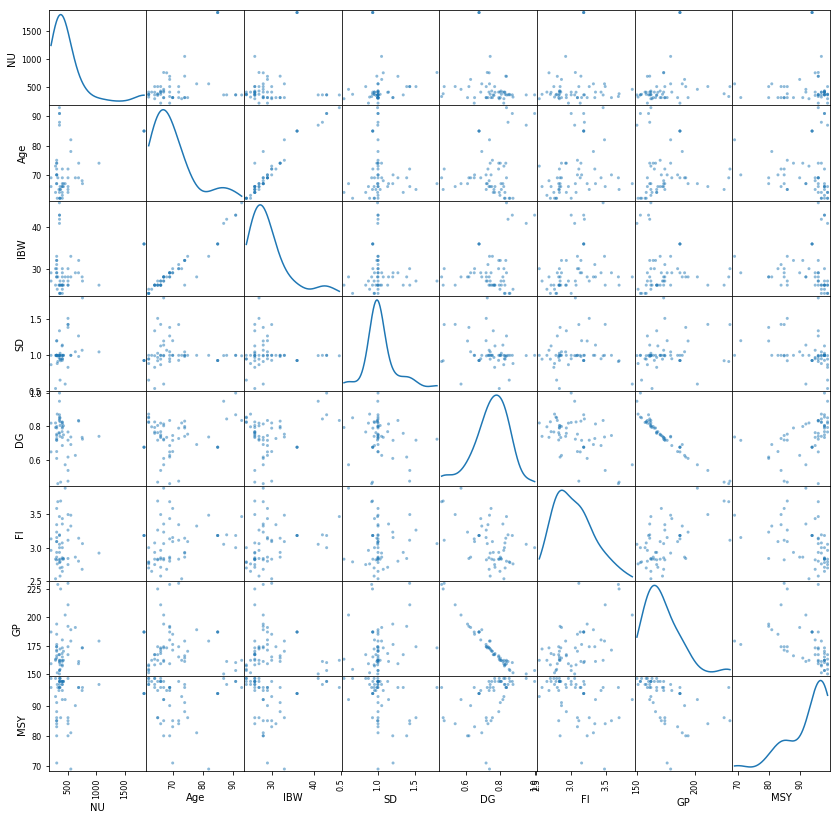

In [11]:
fig_scatter = pd.scatter_matrix(pd_label[['NU', 'Age','IBW', 'SD','DG', 'FI', 'GP', 'MSY']], figsize=(14, 14), diagonal='kde')
plt.savefig('scatter_plot.eps', format='eps', dpi=300)

Converge target values to binary values

In [12]:
pd_label['DG_B'] = (pd_label['DG'] > 0.8).astype(int)
pd_label['FI_B'] = (pd_label['FI'] < 3.0).astype(int)
pd_label['GP_B'] = (pd_label['GP'] < 170).astype(int)
pd_label['MSY_B'] = (pd_label['MSY'] > 95).astype(int)


In [13]:
pd_label.head(5)

,PigroomIdentifyNo,Age,IBW,NU,DG,FI,SD,GP,MSY,DG_B,FI_B,GP_B,MSY_B
0,517180406180816,70,29,301,0.717,3.15,1.204,176,71,0,0,0,0
1,522180105180508,74,32,300,0.800,2.86,1.000,164,91,0,1,1,0
2,522180515180917,67,28,298,0.719,2.82,0.993,174,85,0,1,0,0
3,523180112180513,75,33,300,0.754,3.09,1.000,170,86,0,0,0,0
4,524180119180513,74,32,300,0.791,2.93,1.000,166,88,0,1,1,0


In [14]:
pd_label.describe()

,PigroomIdentifyNo,Age,IBW,NU,DG,FI,SD,GP,MSY,DG_B,FI_B,GP_B,MSY_B
count,5.500000e+01,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000
mean,5.080514e+14,70.981818,29.581818,492.018182,0.744273,3.048727,1.031255,173.927273,92.454545,0.327273,0.472727,0.490909,0.527273
std,2.065565e+13,8.318856,5.195051,360.501014,0.109987,0.300044,0.205821,18.607898,7.200355,0.473542,0.503857,0.504525,0.503857
min,4.801710e+14,62.000000,24.000000,200.000000,0.458000,2.540000,0.538000,150.000000,69.000000,0.000000,0.000000,0.000000,0.000000
25%,4.926803e+14,65.500000,26.000000,315.000000,0.689000,2.830000,0.949500,161.500000,87.000000,0.000000,0.000000,0.000000,0.000000
50%,5.061801e+14,69.000000,28.000000,370.000000,0.754000,3.000000,1.000000,170.000000,96.000000,0.000000,0.000000,0.000000,1.000000
75%,5.186804e+14,74.000000,30.500000,500.000000,0.820500,3.185000,1.038500,182.500000,98.000000,1.000000,1.000000,1.000000,1.000000
max,5.581806e+14,93.000000,46.000000,1844.000000,1.000000,3.880000,1.800000,230.000000,99.000000,1.000000,1.000000,1.000000,1.000000


Remove unncessary data

In [15]:
pd_data = pd_data.drop(['Farm_no', 'PigroomNo'], axis=1)

Organize collected data according to time

In [16]:
pd_data['Date_time'] = pd_data['Date'] + ' ' + pd_data['Time']
pd_data = pd_data.drop(['Date', 'Time'], axis=1)

In [17]:
pd_data['Date_time'] = pd.to_datetime(pd_data['Date_time'])

## 3 different averaging
- **pd_data_10min**: Average over 10 minutes. (**10Min AVG.**)
- **pd_data_2h**   : Average over 2 hours.    (**2H AVG.**) 
- **pd_data_1d**   : Average over 1 days.     (**1D AVG.**)

In [18]:
pd_data_10min = pd_data.groupby('PigroomIdentifyNo').resample('10min', on='Date_time').median()
pd_data_2h = pd_data.groupby('PigroomIdentifyNo').resample('2h', on='Date_time').median()
pd_data_1d = pd_data.groupby('PigroomIdentifyNo').resample('24h', on='Date_time').median()

In [19]:
# Remove the data columns which have bad data
pd_data_10min = pd_data_10min.dropna()
pd_data_2h = pd_data_2h.dropna()
pd_data_1d = pd_data_1d.dropna()

In [20]:
pd_data_10min.PigroomIdentifyNo = pd_data_10min.PigroomIdentifyNo.astype(int)
pd_data_2h.PigroomIdentifyNo = pd_data_2h.PigroomIdentifyNo.astype(int)
pd_data_1d.PigroomIdentifyNo = pd_data_1d.PigroomIdentifyNo.astype(int)

In [21]:
pd_data_10min.describe()

,PigroomIdentifyNo,temp1,temp2,hum1,hum2,co2,effective,tempMax,tempMin
count,5.224330e+05,522433.000000,522433.000000,522433.000000,522433.000000,522433.000000,522433.000000,522433.000000,522433.000000
mean,5.025937e+14,28.032706,28.273598,72.912943,73.258744,379.665954,23.562592,24.449619,9.786323
std,1.675512e+13,4.581716,3.651609,11.804645,10.880644,946.855127,5.181583,0.825315,1.927010
min,4.801710e+14,-29.500000,-18.650000,-2.700000,0.000000,0.000000,-5.855000,23.900000,8.100000
25%,4.881712e+14,26.150000,26.250000,65.900000,66.100000,0.000000,20.270000,23.900000,8.100000
50%,5.011801e+14,28.600000,28.700000,73.950000,73.900000,0.000000,23.770000,23.950000,9.150000
75%,5.151805e+14,30.500000,30.600000,80.950000,80.900000,0.000000,27.070000,24.800000,10.920000
max,5.581806e+14,98.500000,39.700000,100.000000,100.000000,5500.000000,61.570000,27.300000,16.100000


In [22]:
# 10min sampling data
pd_data_10min['temp'] = pd_data_10min[['temp1', 'temp2']].apply(max, axis=1)
pd_data_10min['hum'] = pd_data_10min[['hum1', 'hum2']].apply(max, axis=1)
pd_data_10min['half'] = pd_data_10min[['tempMax', 'tempMin']].apply(np.mean, axis=1)
pd_data_10min = pd_data_10min.drop(['temp1', 'temp2', 'hum1', 'hum2'], axis=1)

In [23]:
pd_data_10min.describe()

,PigroomIdentifyNo,co2,effective,tempMax,tempMin,temp,hum,half
count,5.224330e+05,522433.000000,522433.000000,522433.000000,522433.000000,522433.000000,522433.000000,522433.000000
mean,5.025937e+14,379.665954,23.562592,24.449619,9.786323,28.393244,74.100526,17.117971
std,1.675512e+13,946.855127,5.181583,0.825315,1.927010,3.661469,10.878656,1.368919
min,4.801710e+14,0.000000,-5.855000,23.900000,8.100000,0.000000,0.000000,16.000000
25%,4.881712e+14,0.000000,20.270000,23.900000,8.100000,26.400000,66.800000,16.000000
50%,5.011801e+14,0.000000,23.770000,23.950000,9.150000,28.800000,74.800000,16.550000
75%,5.151805e+14,0.000000,27.070000,24.800000,10.920000,30.700000,81.800000,17.860000
max,5.581806e+14,5500.000000,61.570000,27.300000,16.100000,98.500000,100.000000,21.700000


In [24]:
# 2h sampling data
pd_data_2h['temp'] = pd_data_2h[['temp1', 'temp2']].apply(max, axis=1)
pd_data_2h['hum'] = pd_data_2h[['hum1', 'hum2']].apply(max, axis=1)
pd_data_2h['half'] = pd_data_2h[['tempMax', 'tempMin']].apply(np.mean, axis=1)
pd_data_2h = pd_data_2h.drop(['temp1', 'temp2', 'hum1', 'hum2'], axis=1)

In [25]:
pd_data_2h.describe()

,PigroomIdentifyNo,co2,effective,tempMax,tempMin,temp,hum,half
count,4.378200e+04,43782.000000,43782.000000,43782.000000,43782.000000,43782.000000,43782.000000,43782.000000
mean,5.026452e+14,378.751930,23.566347,24.448426,9.783138,28.391990,74.055015,17.115782
std,1.681240e+13,945.229665,5.171623,0.824603,1.925896,3.638623,10.838608,1.367999
min,4.801710e+14,0.000000,-3.480000,23.900000,8.100000,0.000000,0.000000,16.000000
25%,4.881712e+14,0.000000,20.270000,23.900000,8.100000,26.400000,66.700000,16.000000
50%,5.011801e+14,0.000000,23.770000,23.950000,9.150000,28.800000,74.800000,16.550000
75%,5.151805e+14,0.000000,27.045000,24.800000,10.920000,30.700000,81.700000,17.860000
max,5.581806e+14,5500.000000,42.620000,27.300000,16.100000,62.800000,100.000000,21.700000


In [26]:
# 1d sampling data
pd_data_1d['temp'] = pd_data_1d[['temp1', 'temp2']].apply(max, axis=1)
pd_data_1d['hum'] = pd_data_1d[['hum1', 'hum2']].apply(max, axis=1)
pd_data_1d['half'] = pd_data_1d[['tempMax', 'tempMin']].apply(np.mean, axis=1)
pd_data_1d = pd_data_1d.drop(['temp1', 'temp2', 'hum1', 'hum2'], axis=1)

In [27]:
pd_data_1d.describe()

,PigroomIdentifyNo,co2,effective,tempMax,tempMin,temp,hum,half
count,3.755000e+03,3755.000000,3755.000000,3755.000000,3755.000000,3755.000000,3755.000000,3755.000000
mean,5.028513e+14,381.586285,23.401531,24.448836,9.786370,28.118469,75.041198,17.117603
std,1.685197e+13,943.165256,4.949904,0.822467,1.920959,3.235200,9.149223,1.364435
min,4.801710e+14,0.000000,-3.280000,23.900000,8.100000,0.000000,0.000000,16.000000
25%,4.881712e+14,0.000000,20.120000,23.900000,8.100000,26.300000,68.700000,16.000000
50%,5.011801e+14,0.000000,23.670000,23.950000,9.150000,28.800000,75.300000,16.550000
75%,5.151805e+14,0.000000,26.670000,24.825000,10.955000,30.325000,81.100000,17.890000
max,5.581806e+14,5500.000000,34.070000,27.300000,16.100000,37.000000,99.900000,21.700000


Summarize the data

In [28]:
pd_data_10min = pd_data_10min.reset_index(level=0, drop=True)
pd_data_2h = pd_data_2h.reset_index(level=0, drop=True)
pd_data_1d = pd_data_1d.reset_index(level=0, drop=True)

In [29]:
pd_data_10min['PigroomIdentifyNo'] = pd_data_10min['PigroomIdentifyNo'].astype(int)
pd_data_2h['PigroomIdentifyNo'] = pd_data_2h['PigroomIdentifyNo'].astype(int)
pd_data_1d['PigroomIdentifyNo'] = pd_data_1d['PigroomIdentifyNo'].astype(int)

Figs. 2-5

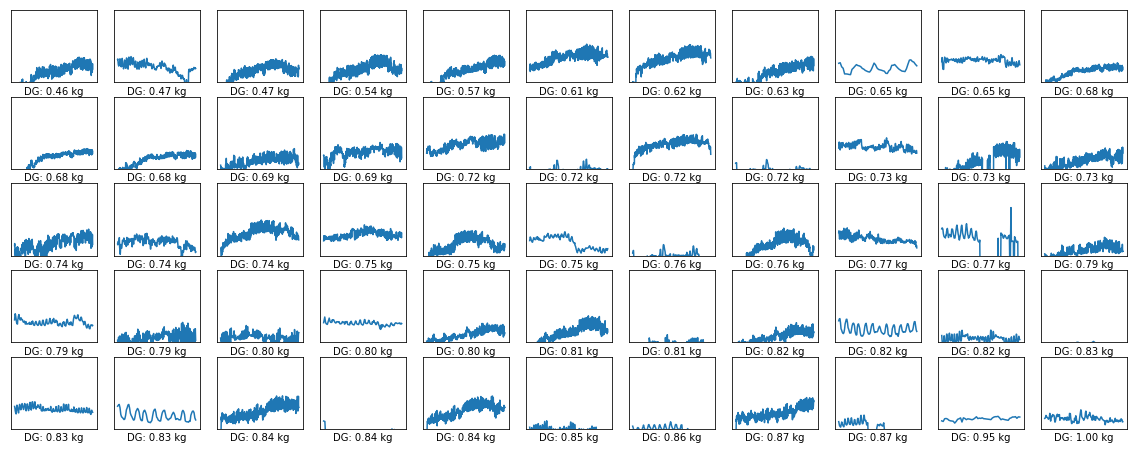

In [30]:
## 2h sampling
pd_DG = pd_label.sort_values(by=['DG'])
plt.figure(figsize=(20, 30))

for i in range(55):
    plt.subplot(19,11,i+1)
    pd_DG_index = pd_DG.iloc[i, 0]
    plt.xticks([])
    plt.yticks([])
    plt.ylim(0, 40)
    plt.plot(pd_data_2h[pd_data_2h.PigroomIdentifyNo==pd_DG_index].effective.values - pd_data_2h[pd_data_2h.PigroomIdentifyNo==pd_DG_index].half.values)
    plt.xlabel("DG: %0.2f kg"%(pd_label.DG[pd_label.PigroomIdentifyNo==pd_DG_index]))
    
plt.savefig('DG_plot.eps', format='eps', dpi=300)



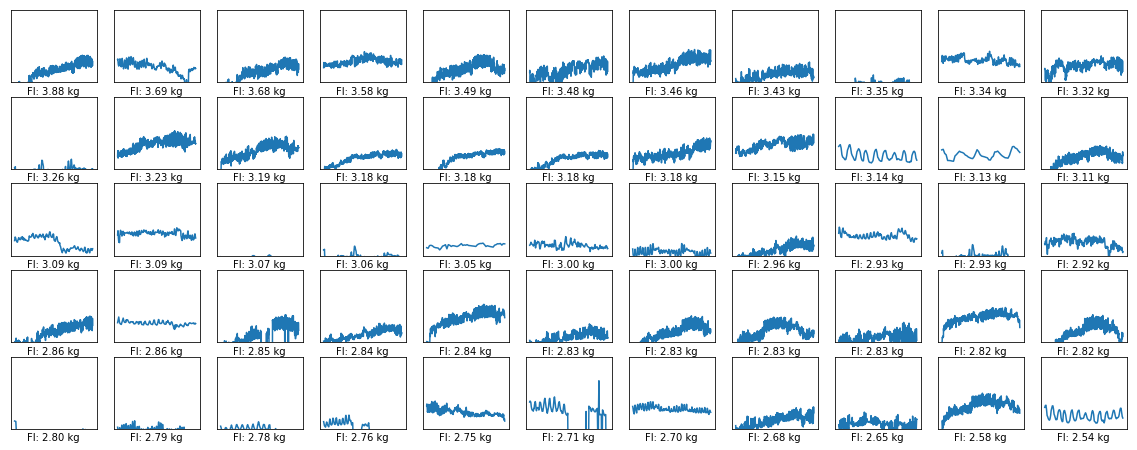

In [31]:
## 2h sampling
pd_FI = pd_label.sort_values(by=['FI'], ascending=False)
plt.figure(figsize=(20, 30))

for i in range(55):
    plt.subplot(19,11,i+1)
    pd_FI_index = pd_FI.iloc[i, 0]
    plt.xticks([])
    plt.yticks([])
    plt.ylim(0, 40)
    plt.plot(pd_data_2h[pd_data_2h.PigroomIdentifyNo==pd_FI_index].effective.values - pd_data_2h[pd_data_2h.PigroomIdentifyNo==pd_FI_index].half.values)
    plt.xlabel("FI: %0.2f kg"%(pd_label.FI[pd_label.PigroomIdentifyNo==pd_FI_index]))
    
plt.savefig('FI_plot.eps', format='eps', dpi=300)


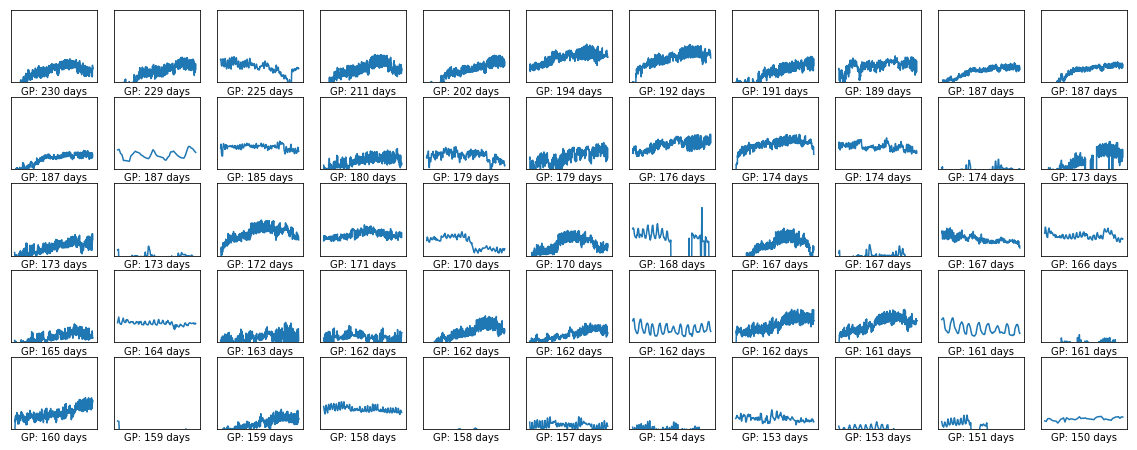

In [32]:
## 2h sampling
pd_GP = pd_label.sort_values(by=['GP'], ascending=False)
plt.figure(figsize=(20, 30))

for i in range(55):
    plt.subplot(19,11,i+1)
    pd_GP_index = pd_GP.iloc[i, 0]
    plt.xticks([])
    plt.yticks([])
    plt.ylim(0, 40)
    plt.plot(pd_data_2h[pd_data_2h.PigroomIdentifyNo==pd_GP_index].effective.values - pd_data_2h[pd_data_2h.PigroomIdentifyNo==pd_GP_index].half.values)
    plt.xlabel("GP: %d days"%(pd_label.GP[pd_label.PigroomIdentifyNo==pd_GP_index]))
    
plt.savefig('GP_plot.eps', format='eps', dpi=300)

    

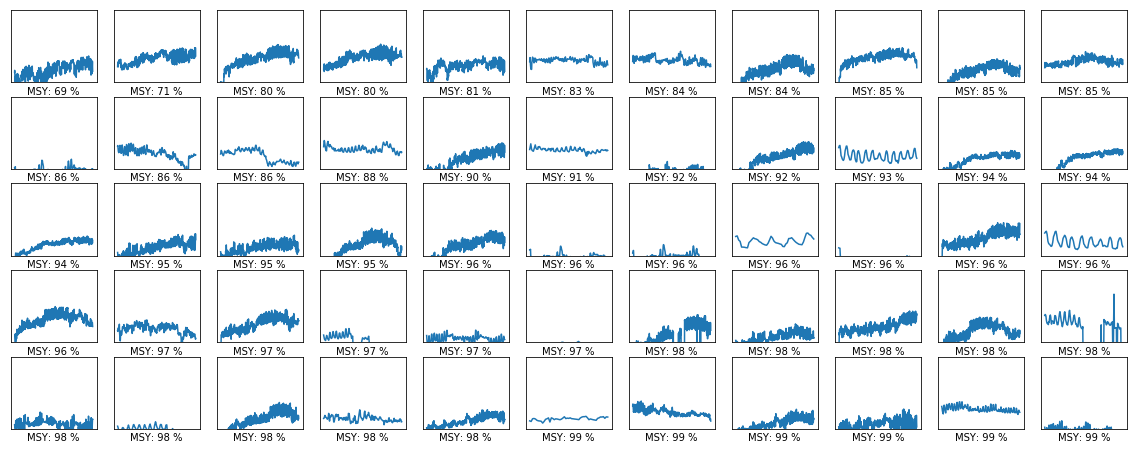

In [33]:
## 2h sampling
pd_MSY = pd_label.sort_values(by=['MSY'])
plt.figure(figsize=(20, 30))

for i in range(55):
    plt.subplot(19,11,i+1)
    pd_MSY_index = pd_MSY.iloc[i, 0]
    plt.xticks([])
    plt.yticks([])
    plt.ylim(0, 40)
    plt.plot(pd_data_2h[pd_data_2h.PigroomIdentifyNo==pd_MSY_index].effective.values - pd_data_2h[pd_data_2h.PigroomIdentifyNo==pd_MSY_index].half.values)
    plt.xlabel("MSY: %d %%"%(pd_label.MSY[pd_label.PigroomIdentifyNo==pd_MSY_index]))
    
plt.savefig('MSY_plot.eps', format='eps', dpi=300)
    

In [69]:
pd_data_10min

,PigroomIdentifyNo,co2,effective,tempMax,tempMin,temp,hum,half
Date_time,,,,,,,,
2018-02-09 13:50:00,480171030180306,2915.0,20.320,23.9,8.1,22.6,66.70,16.0
2018-02-09 14:00:00,480171030180306,2872.0,20.270,23.9,8.1,22.6,66.40,16.0
2018-02-09 14:10:00,480171030180306,2855.0,20.170,23.9,8.1,22.5,66.90,16.0
2018-02-09 14:20:00,480171030180306,2881.0,20.170,23.9,8.1,22.5,67.70,16.0
2018-02-09 17:10:00,480171030180306,3375.5,20.020,23.9,8.1,22.3,69.80,16.0
2018-02-09 17:20:00,480171030180306,3407.0,20.020,23.9,8.1,22.4,69.95,16.0
2018-02-09 17:30:00,480171030180306,3624.5,20.170,23.9,8.1,22.6,70.95,16.0
2018-02-09 17:40:00,480171030180306,3646.0,20.220,23.9,8.1,22.6,70.80,16.0
2018-02-23 15:10:00,480171030180306,4157.5,14.220,23.9,8.1,21.6,80.35,16.0


In [70]:
pd_label = pd_label.drop(['DG', 'FI', 'GP', 'MSY'], axis=1)

In [73]:
pd_label

,PigroomIdentifyNo,Age,IBW,NU,SD,DG_B,FI_B,GP_B,MSY_B
0,517180406180816,70,29,301,1.204,0,0,0,0
1,522180105180508,74,32,300,1.000,0,1,1,0
2,522180515180917,67,28,298,0.993,0,1,0,0
3,523180112180513,75,33,300,1.000,0,0,0,0
4,524180119180513,74,32,300,1.000,0,1,1,0
5,525180126180530,70,30,300,1.000,0,0,0,0
6,518180306180705,70,29,300,1.000,0,0,0,0
7,519180417180906,69,28,500,1.389,0,1,0,0
8,520180411180912,67,28,300,1.200,0,0,0,0
9,521180202180607,72,31,300,1.000,0,0,0,0


## Machine learning code
- Above code for preprocess of data maynot work because we do not privide raw data
- The following code will work since we provide preprocessed data

In [76]:
## Used to generate full feature set

def preprocess_data(data, pd_label, uniq_pig_id, metric_val):
    data_preprocessed = []
    for i in range(55):
        temp_list = np.array([])
        sel_data = data[data.PigroomIdentifyNo==uniq_pig_id[i]]
        sel_label = pd_label[pd_label.PigroomIdentifyNo==uniq_pig_id[i]]
        dev_from_norm = sel_data.effective-sel_data.half
        dev_from_norm_desc = dev_from_norm.describe()
        aa = sel_data.describe()
        ## Adding temperature
        temp_list = np.hstack((temp_list, np.asarray(aa.temp.values[[1, 2, 3, 7]]).ravel()))
        ## Adding humidity
        temp_list = np.hstack((temp_list, np.asarray(aa.hum.values[[1, 2, 3, 7]]).ravel()))
        ## Adding effective
        temp_list = np.hstack((temp_list, np.asarray(aa.effective.values[[1, 2, 3, 7]]).ravel()))
        ## Adding half
        temp_list = np.hstack((temp_list, np.asarray(aa.half.values[[1, 2, 3, 7]]).ravel()))
        ## Adding deviation from 16.5
        temp_list = np.hstack((temp_list, np.asarray(dev_from_norm_desc.values[[1, 2, 3, 7]].ravel())))
        ## Adding Num_units, Age, init_weig
        temp_list = np.hstack((temp_list, np.asarray(sel_label.values[0][1:5]).ravel()))
        ## Adding Density
        temp_list = np.hstack((temp_list, np.asarray(sel_label.values[0][sel_label.columns.get_loc(metric_val)]).ravel()))
        data_preprocessed.append(temp_list.ravel())
    data_preprocessed = np.array(data_preprocessed)
    return data_preprocessed

In [74]:
## Used to generate partial feature set

def preprocess_data_simple(data, pd_label, uniq_pig_id, metric_val):
    data_preprocessed = []
    for i in range(55):
        temp_list = np.array([])
        sel_data = data[data.PigroomIdentifyNo==uniq_pig_id[i]]
        sel_label = pd_label[pd_label.PigroomIdentifyNo==uniq_pig_id[i]]
        dev_from_norm = sel_data.effective-sel_data.half
        dev_from_norm_desc = dev_from_norm.describe()
        aa = sel_data.describe()
        ## Adding effective
        temp_list = np.hstack((temp_list, np.asarray(aa.effective.values[[1, 2, 3, 7]]).ravel()))
        ## Adding half
        temp_list = np.hstack((temp_list, np.asarray(aa.half.values[[1, 2, 3, 7]]).ravel()))
        ## Adding deviation from 16.5
        temp_list = np.hstack((temp_list, np.asarray(dev_from_norm_desc[2].ravel())))
        ## Adding Num_units, Age, init_weig
        temp_list = np.hstack((temp_list, np.asarray(sel_label.values[0][1:5]).ravel()))
        temp_list = np.hstack((temp_list, np.asarray(sel_label.values[0][sel_label.columns.get_loc(metric_val)]).ravel()))
        data_preprocessed.append(temp_list.ravel())
    data_preprocessed = np.array(data_preprocessed)
    return data_preprocessed

### Data set for DG

In [77]:
## Generate full feature set - DG

## 10MIN AVG. 
uniq_pig_id = list(set(pd_data_10min.PigroomIdentifyNo.values))
prep_data_10M_full_DG = preprocess_data(pd_data_10min, pd_label, uniq_pig_id, "DG_B")

## 2H AVG. 
uniq_pig_id = list(set(pd_data_2h.PigroomIdentifyNo.values))
prep_data_2H_full_DG = preprocess_data(pd_data_2h, pd_label, uniq_pig_id, "DG_B")


## 1D AVG. 
uniq_pig_id = list(set(pd_data_1d.PigroomIdentifyNo.values))
prep_data_1D_full_DG = preprocess_data(pd_data_1d, pd_label, uniq_pig_id, "DG_B")

np.savetxt("F_10_M_DG.csv", prep_data_10m_full_DG, delimiter=",")
np.savetxt("F_2_H_DG.csv", prep_data_2H_full_DG, delimiter=",")
np.savetxt("F_1_D_DG.csv", prep_data_1D_full_DG, delimiter=",")


In [78]:
## Generate partial feature set - DG

## 10MIN AVG. 
uniq_pig_id = list(set(pd_data_10min.PigroomIdentifyNo.values))
prep_data_10M_part_DG = preprocess_data_simple(pd_data_10min, pd_label, uniq_pig_id, "DG_B")

## 2H AVG. 
uniq_pig_id = list(set(pd_data_2h.PigroomIdentifyNo.values))
prep_data_2H_part_DG = preprocess_data_simple(pd_data_2h, pd_label, uniq_pig_id, "DG_B")


## 1D AVG. 
uniq_pig_id = list(set(pd_data_1d.PigroomIdentifyNo.values))
prep_data_1D_part_DG = preprocess_data_simple(pd_data_1d, pd_label, uniq_pig_id, "DG_B")

np.savetxt("P_10_M_DG.csv", prep_data_10m_part_DG, delimiter=",")
np.savetxt("P_2_H_DG.csv", prep_data_2H_part_DG, delimiter=",")
np.savetxt("P_1_D_DG.csv", prep_data_1D_part_DG, delimiter=",")


### Data set for FI

In [79]:
## Generate full feature set - FI

## 10MIN AVG. 
uniq_pig_id = list(set(pd_data_10min.PigroomIdentifyNo.values))
prep_data_10M_full_FI = preprocess_data(pd_data_10min, pd_label, uniq_pig_id, "FI_B")

## 2H AVG. 
uniq_pig_id = list(set(pd_data_2h.PigroomIdentifyNo.values))
prep_data_2H_full_FI = preprocess_data(pd_data_2h, pd_label, uniq_pig_id, "FI_B")


## 1D AVG. 
uniq_pig_id = list(set(pd_data_1d.PigroomIdentifyNo.values))
prep_data_1D_full_FI = preprocess_data(pd_data_1d, pd_label, uniq_pig_id, "FI_B")

np.savetxt("F_10_M_FI.csv", prep_data_10m_full_FI, delimiter=",")
np.savetxt("F_2_H_FI.csv", prep_data_2H_full_FI, delimiter=",")
np.savetxt("F_1_D_FI.csv", prep_data_1D_full_FI, delimiter=",")


In [94]:
## Generate partial feature set - FI

## 10MIN AVG. 
uniq_pig_id = list(set(pd_data_10min.PigroomIdentifyNo.values))
prep_data_10M_part_FI = preprocess_data_simple(pd_data_10min, pd_label, uniq_pig_id, "FI_B")

## 2H AVG. 
uniq_pig_id = list(set(pd_data_2h.PigroomIdentifyNo.values))
prep_data_2H_part_FI = preprocess_data_simple(pd_data_2h, pd_label, uniq_pig_id, "FI_B")


## 1D AVG. 
uniq_pig_id = list(set(pd_data_1d.PigroomIdentifyNo.values))
prep_data_1D_part_FI = preprocess_data_simple(pd_data_1d, pd_label, uniq_pig_id, "FI_B")

np.savetxt("P_10_M_FI.csv", prep_data_10m_part_DG, delimiter=",")
np.savetxt("P_2_H_FI.csv", prep_data_2H_part_DG, delimiter=",")
np.savetxt("P_1_D_FI.csv", prep_data_1D_part_DG, delimiter=",")


In [ ]:


### Data set for GP

In [81]:
## Generate full feature set - GP

## 10MIN AVG. 
uniq_pig_id = list(set(pd_data_10min.PigroomIdentifyNo.values))
prep_data_10M_full_GP = preprocess_data(pd_data_10min, pd_label, uniq_pig_id, "GP_B")

## 2H AVG. 
uniq_pig_id = list(set(pd_data_2h.PigroomIdentifyNo.values))
prep_data_2H_full_GP = preprocess_data(pd_data_2h, pd_label, uniq_pig_id, "GP_B")


## 1D AVG. 
uniq_pig_id = list(set(pd_data_1d.PigroomIdentifyNo.values))
prep_data_1D_full_GP = preprocess_data(pd_data_1d, pd_label, uniq_pig_id, "GP_B")

np.savetxt("F_10_M_GP.csv", prep_data_10m_full_GP, delimiter=",")
np.savetxt("F_2_H_GP.csv", prep_data_2H_full_GP, delimiter=",")
np.savetxt("F_1_D_GP.csv", prep_data_1D_full_GP, delimiter=",")


In [82]:
## Generate partial feature set - GP

## 10MIN AVG. 
uniq_pig_id = list(set(pd_data_10min.PigroomIdentifyNo.values))
prep_data_10M_part_GP = preprocess_data_simple(pd_data_10min, pd_label, uniq_pig_id, "GP_B")

## 2H AVG. 
uniq_pig_id = list(set(pd_data_2h.PigroomIdentifyNo.values))
prep_data_2H_part_GP = preprocess_data_simple(pd_data_2h, pd_label, uniq_pig_id, "GP_B")


## 1D AVG. 
uniq_pig_id = list(set(pd_data_1d.PigroomIdentifyNo.values))
prep_data_1D_part_GP = preprocess_data_simple(pd_data_1d, pd_label, uniq_pig_id, "GP_B")

np.savetxt("P_10_M_GP.csv", prep_data_10m_part_GP, delimiter=",")
np.savetxt("P_2_H_GP.csv", prep_data_2H_part_GP, delimiter=",")
np.savetxt("P_1_D_GP.csv", prep_data_1D_part_GP, delimiter=",")


### Data set for MSY

In [83]:
## Generate full feature set - MSY

## 10MIN AVG. 
uniq_pig_id = list(set(pd_data_10min.PigroomIdentifyNo.values))
prep_data_10M_full_MSY = preprocess_data(pd_data_10min, pd_label, uniq_pig_id, "MSY_B")

## 2H AVG. 
uniq_pig_id = list(set(pd_data_2h.PigroomIdentifyNo.values))
prep_data_2H_full_MSY = preprocess_data(pd_data_2h, pd_label, uniq_pig_id, "MSY_B")


## 1D AVG. 
uniq_pig_id = list(set(pd_data_1d.PigroomIdentifyNo.values))
prep_data_1D_full_MSY = preprocess_data(pd_data_1d, pd_label, uniq_pig_id, "MSY_B")

np.savetxt("F_10_M_MSY.csv", prep_data_10m_full_MSY, delimiter=",")
np.savetxt("F_2_H_MSY.csv", prep_data_2H_full_MSY, delimiter=",")
np.savetxt("F_1_D_MSY.csv", prep_data_1D_full_MSY, delimiter=",")


In [84]:
## Generate partial feature set - MSY

## 10MIN AVG. 
uniq_pig_id = list(set(pd_data_10min.PigroomIdentifyNo.values))
prep_data_10M_part_MSY = preprocess_data_simple(pd_data_10min, pd_label, uniq_pig_id, "MSY_B")

## 2H AVG. 
uniq_pig_id = list(set(pd_data_2h.PigroomIdentifyNo.values))
prep_data_2H_part_MSY = preprocess_data_simple(pd_data_2h, pd_label, uniq_pig_id, "MSY_B")


## 1D AVG. 
uniq_pig_id = list(set(pd_data_1d.PigroomIdentifyNo.values))
prep_data_1D_part_MSY = preprocess_data_simple(pd_data_1d, pd_label, uniq_pig_id, "MSY_B")

np.savetxt("P_10_M_MSY.csv", prep_data_10m_part_MSY, delimiter=",")
np.savetxt("P_2_H_MSY.csv", prep_data_2H_part_MSY, delimiter=",")
np.savetxt("P_1_D_MSY.csv", prep_data_1D_part_MSY, delimiter=",")


Restore the saved preprocessed data

In [95]:
prep_data_10M_full_DG = genfromtxt('F_10_M_DG.csv', delimiter=',')
prep_data_2H_full_DG = genfromtxt('F_2_H_DG.csv', delimiter=',')
prep_data_1D_full_DG = genfromtxt('F_1_D_DG.csv', delimiter=',')

prep_data_10M_part_DG = genfromtxt('P_10_M_DG.csv', delimiter=',')
prep_data_2H_part_DG = genfromtxt('P_2_H_DG.csv', delimiter=',')
prep_data_1D_part_DG = genfromtxt('P_1_D_DG.csv', delimiter=',')



prep_data_10M_full_FI = genfromtxt('F_10_M_FI.csv', delimiter=',')
prep_data_2H_full_FI = genfromtxt('F_2_H_FI.csv', delimiter=',')
prep_data_1D_full_FI = genfromtxt('F_1_D_FI.csv', delimiter=',')

prep_data_10M_part_FI = genfromtxt('P_10_M_FI.csv', delimiter=',')
prep_data_2H_part_FI = genfromtxt('P_2_H_FI.csv', delimiter=',')
prep_data_1D_part_FI = genfromtxt('P_1_D_FI.csv', delimiter=',')



prep_data_10M_full_GP = genfromtxt('F_10_M_GP.csv', delimiter=',')
prep_data_2H_full_GP = genfromtxt('F_2_H_GP.csv', delimiter=',')
prep_data_1D_full_GP = genfromtxt('F_1_D_GP.csv', delimiter=',')

prep_data_10M_part_GP = genfromtxt('P_10_M_GP.csv', delimiter=',')
prep_data_2H_part_GP = genfromtxt('P_2_H_GP.csv', delimiter=',')
prep_data_1D_part_GP = genfromtxt('P_1_D_GP.csv', delimiter=',')




prep_data_10M_full_MSY = genfromtxt('F_10_M_MSY.csv', delimiter=',')
prep_data_2H_full_MSY = genfromtxt('F_2_H_MSY.csv', delimiter=',')
prep_data_1D_full_MSY = genfromtxt('F_1_D_MSY.csv', delimiter=',')

prep_data_10M_part_MSY = genfromtxt('P_10_M_MSY.csv', delimiter=',')
prep_data_2H_part_MSY = genfromtxt('P_2_H_MSY.csv', delimiter=',')
prep_data_1D_part_MSY = genfromtxt('P_1_D_MSY.csv', delimiter=',')

In [159]:
def ML_result(data):
    a_1 = []
    a_2 = []
    a_3 = []
    b_1 = []
    b_2 = []
    b_3 = []
    c_1 = []
    c_2 = []
    c_3 = []
    d_1 = []
    d_2 = []
    d_3 = []
    
    for jj in range(1002):
    
        #if jj%25==0:
        #    print(jj)
        ##############################
        ## Read data from ori_data
        #############################
        feature = data[:,:-1]
        label = data[:,-1]      

        rand_per = np.random.permutation(feature.shape[0])
        feature = feature[rand_per]
        label = label[rand_per]

        train_ratio = 0.9
        train_size = int(feature.shape[0]*train_ratio)


        feature_tr = feature[:train_size]
        feature_te = feature[train_size:]

        label_tr = label[:train_size]
        label_te = label[train_size:]


        # Logistic regression
        clf_l_1 = linear_model.LogisticRegression(C=1e8)
        # SVM
        clf_s_1 = svm.LinearSVC(class_weight='balanced')

        # Decision tree
        clf_d_1 = tree.DecisionTreeClassifier(max_depth = 4)
    
        # Random forest
        clf_r_1 = RandomForestClassifier(max_depth=2, random_state=0)
        

        clf_l_1.fit(feature_tr, label_tr)
        clf_s_1.fit(feature_tr, label_tr)
        clf_d_1.fit(feature_tr, label_tr)
        clf_r_1.fit(feature_tr, label_tr)


        a_1.append(np.resize(precision_score(label_te, clf_l_1.predict(feature_te), average=None), (2,1)) )
        a_2.append(accuracy_score(label_te, clf_l_1.predict(feature_te)) )
    
        b_1.append(np.resize(precision_score(label_te, clf_s_1.predict(feature_te), average=None), (2,1)) )
        b_2.append(accuracy_score(label_te, clf_s_1.predict(feature_te)) )
    
        c_1.append(np.resize(precision_score(label_te, clf_d_1.predict(feature_te), average=None), (2,1)) )
        c_2.append(accuracy_score(label_te, clf_d_1.predict(feature_te)) )
    
        d_1.append(np.resize(precision_score(label_te, clf_r_1.predict(feature_te), average=None), (2,1)) )
        d_2.append(accuracy_score(label_te, clf_r_1.predict(feature_te)) )
        
        
    a_1 = np.array(a_1)
    a_2 = np.array(a_2)
    b_1 = np.array(b_1)
    b_2 = np.array(b_2)
    c_1 = np.array(c_1)
    c_2 = np.array(c_2)
    d_1 = np.array(d_1)
    d_2 = np.array(d_2)
    
    conv_val = max(np.sum(label)/len(label), 1-np.sum(label)/len(label))
    print("")
    print("Basic results without ML: %0.2f" %(conv_val*100))
    print("")
    print("Logistic regression, SVM, Decision tree, Random")
    print("%0.2f  %0.2f   %0.2f   %0.2f"%(np.array(a_2).mean()*100, np.array(b_2).mean()*100, np.array(c_2).mean()*100, np.array(d_2).mean()*100))
    print("")
    
    return a_1, a_2, b_1, b_2, c_1, c_2, d_1, d_2

In [131]:
def Draw_Tree(data, colum_data): 
    feature = data[:,:-1]
    label = data[:,-1]      
    clf_d_1 = tree.DecisionTreeClassifier(max_depth = 4)
    clf_d_1.fit(feature, label)
    dot_data = StringIO()
    tree.export_graphviz(clf_d_1,
        out_file=dot_data,
        filled=True, rounded=True, feature_names=colum_data,
        impurity=False)
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
    Image(graph.create_png())

Accuracy can be obtained as follows

## DG

In [132]:
_, _, _, _, _, _, _, _ = ML_result(prep_data_10M_full_DG)


Basic results without ML: 0.67

Logistic regression, SVM, Decision tree, Random
61.71  61.18   68.88   72.67



In [133]:
_, _, _, _, _, _, _, _ = ML_result(prep_data_2H_full_DG)


Basic results without ML: 0.67

Logistic regression, SVM, Decision tree, Random
63.54  63.94   69.94   72.06



In [134]:
_, _, _, _, _, _, _, _ = ML_result(prep_data_1D_full_DG)


Basic results without ML: 0.67

Logistic regression, SVM, Decision tree, Random
65.04  63.44   66.12   70.56



In [135]:
_, _, _, _, _, _, _, _ = ML_result(prep_data_10M_part_DG)


Basic results without ML: 0.67

Logistic regression, SVM, Decision tree, Random
73.17  62.97   78.61   67.50



In [136]:
_, _, _, _, _, _, _, _ = ML_result(prep_data_2H_part_DG)


Basic results without ML: 0.67

Logistic regression, SVM, Decision tree, Random
70.66  62.69   77.16   67.40



In [137]:
_, _, _, _, _, _, _, _ = ML_result(prep_data_1D_part_DG)


Basic results without ML: 0.67

Logistic regression, SVM, Decision tree, Random
71.14  63.89   72.19   68.28



## FI

In [138]:
_, _, _, _, _, _, _, _ = ML_result(prep_data_10M_full_FI)


Basic results without ML: 0.53

Logistic regression, SVM, Decision tree, Random
66.73  56.52   58.28   54.24



In [139]:
_, _, _, _, _, _, _, _ = ML_result(prep_data_2H_full_FI)


Basic results without ML: 0.53

Logistic regression, SVM, Decision tree, Random
66.02  54.54   58.65   55.12



In [140]:
_, _, _, _, _, _, _, _ = ML_result(prep_data_1D_full_FI)


Basic results without ML: 0.53

Logistic regression, SVM, Decision tree, Random
55.74  59.00   55.99   56.19



In [141]:
_, _, _, _, _, _, _, _ = ML_result(prep_data_10M_part_FI)


Basic results without ML: 0.67

Logistic regression, SVM, Decision tree, Random
73.05  61.33   79.03   67.48



In [142]:
_, _, _, _, _, _, _, _ = ML_result(prep_data_2H_part_FI)


Basic results without ML: 0.67

Logistic regression, SVM, Decision tree, Random
71.01  63.17   77.84   66.85



In [143]:
_, _, _, _, _, _, _, _ = ML_result(prep_data_1D_part_FI)


Basic results without ML: 0.67

Logistic regression, SVM, Decision tree, Random
72.17  63.42   73.00   69.21



## GP

In [144]:
_, _, _, _, _, _, _, _ = ML_result(prep_data_10M_full_GP)


Basic results without ML: 0.51

Logistic regression, SVM, Decision tree, Random
64.87  61.99   72.55   66.05



In [145]:
_, _, _, _, _, _, _, _ = ML_result(prep_data_2H_full_GP)


Basic results without ML: 0.51

Logistic regression, SVM, Decision tree, Random
64.90  63.04   71.06   65.90



In [146]:
_, _, _, _, _, _, _, _ = ML_result(prep_data_1D_full_GP)


Basic results without ML: 0.51

Logistic regression, SVM, Decision tree, Random
67.78  60.33   67.85   66.05



In [147]:
_, _, _, _, _, _, _, _ = ML_result(prep_data_10M_part_GP)


Basic results without ML: 0.51

Logistic regression, SVM, Decision tree, Random
72.95  59.45   66.70   65.60



In [148]:
_, _, _, _, _, _, _, _ = ML_result(prep_data_2H_part_GP)


Basic results without ML: 0.51

Logistic regression, SVM, Decision tree, Random
74.23  58.33   65.95   64.87



In [149]:
_, _, _, _, _, _, _, _ = ML_result(prep_data_1D_part_GP)


Basic results without ML: 0.51

Logistic regression, SVM, Decision tree, Random
70.92  62.41   68.03   63.64



## MSY

In [150]:
_, _, _, _, _, _, _, _ = ML_result(prep_data_10M_full_MSY)


Basic results without ML: 0.53

Logistic regression, SVM, Decision tree, Random
59.28  54.19   64.14   60.75



In [151]:
_, _, _, _, _, _, _, _ = ML_result(prep_data_2H_full_MSY)


Basic results without ML: 0.53

Logistic regression, SVM, Decision tree, Random
61.93  57.12   69.83   60.94



In [152]:
_, _, _, _, _, _, _, _ = ML_result(prep_data_1D_full_MSY)


Basic results without ML: 0.53

Logistic regression, SVM, Decision tree, Random
60.33  60.56   68.30   61.43



In [153]:
_, _, _, _, _, _, _, _ = ML_result(prep_data_10M_part_MSY)


Basic results without ML: 0.53

Logistic regression, SVM, Decision tree, Random
71.94  56.25   68.01   63.74



In [154]:
_, _, _, _, _, _, _, _ = ML_result(prep_data_2H_part_MSY)


Basic results without ML: 0.53

Logistic regression, SVM, Decision tree, Random
69.26  55.89   68.35   63.46



In [155]:
_, _, _, _, _, _, _, _ = ML_result(prep_data_1D_part_MSY)


Basic results without ML: 0.53

Logistic regression, SVM, Decision tree, Random
71.01  56.64   67.78   64.35



In [160]:
_, _, _, _, _, _, _, _ = ML_result(prep_data_10M_full_DG)


Basic results without ML: 67.27

Logistic regression, SVM, Decision tree, Random
62.41  62.01   68.91   73.47



In [161]:
_, _, _, _, _, _, _, _ = ML_result(prep_data_10M_full_FI)


Basic results without ML: 52.73

Logistic regression, SVM, Decision tree, Random
66.92  58.62   58.08   55.47



In [162]:
_, _, _, _, _, _, _, _ = ML_result(prep_data_10M_full_GP)


Basic results without ML: 50.91

Logistic regression, SVM, Decision tree, Random
65.25  62.23   73.60   65.77



In [163]:
_, _, _, _, _, _, _, _ = ML_result(prep_data_10M_full_MSY)


Basic results without ML: 52.73

Logistic regression, SVM, Decision tree, Random
60.18  55.01   66.33   61.03

